In [4]:
import json
import pickle
import requests
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from PIL import Image

In [4]:
month_df = pd.read_csv("/home/ksg502/projects/frame-align/data/raw/2023-24/July-23/datawithmetatopics_merged.csv")

In [8]:
month_df['meta-topic-short'].value_counts()[2:10].sum()

40169

In [40]:
data_path = Path("/home/ksg502/projects/frame-align/data/raw/2023-24/")
examples = 0
for month in data_path.iterdir():
    df = pd.read_csv(month / "datawithtopics_merged.csv")
    examples += len(df)

In [ ]:
examples

1870209

In [7]:
data_path = Path("../data/raw/2023-24/")
topics = []
for month_dir in data_path.iterdir():
    df = pd.read_csv(month_dir/"datawithtopics_merged.csv")
    topics.extend(df['auto_topic_label'].unique().tolist())
topics = list(set(topics))

In [ ]:
# Iterate through topics 100 at a time
for i in range(0, len(topics), 100):
    topic_batch = topics[i:i+100]
    print(len(topic_batch))

In [14]:
topics = month_df['auto_topic_label'].unique()
len(topics)

276

In [6]:
month_df['meta-topic'].value_counts()

meta-topic
Crime/Accidents                  116023
Sports                            11407
Geopolitics/War                    4771
Crime                              4098
Sports/Baseball                    3962
                                  ...  
Workplace                            23
Obituaries                           22
பட_મણ_டன_પણ_કય_ካብ_ઓન_እና_થય_રમ        21
Local News                           15
Human Interest                       15
Name: count, Length: 231, dtype: int64

In [6]:
month_df['meta-topic-short'].value_counts().sort_values(ascending=False)

meta-topic-short
Crime                      122833
Sports                      25401
Politics                     8971
Business                     7069
Geopolitics                  6209
Entertainment                4996
Health                       4072
Weather                      3275
Law                          2925
Technology                   2652
Environment                  2512
Culture                      1983
Accidents                    1763
Lifestyle                    1722
Finance                      1688
Economy                       817
Wildlife                      767
Social Issues                 695
Transportation                671
Science                       572
Labor                         565
Education                     529
Media                         523
Animals                       515
Travel                        360
International Relations       286
News                          234
World                         228
LGBTQ+                        2

In [ ]:

topic_samples['meta-topic-short'].value_counts()

In [11]:
topic_samples_annotated = pd.read_json("/home/ksg502/projects/frame-align/data/annotated/topic_sampled_jul23_annotated_Mistral.jsonl", lines=True)  

In [12]:
len(topic_samples_annotated)

450

In [6]:
merged_df = pd.concat([topic_samples, topic_samples_annotated], axis=1)

In [7]:
merged_df.columns

Index(['topic', 'auto_topic_label', 'title', 'authors', 'date_download',
       'date_modify', 'date_publish', 'description', 'filename', 'image_url',
       'language', 'localpath', 'maintext', 'source_domain', 'title_page',
       'title_rss', 'url', 'id', 'meta-topic', 'meta-topic-short', 'summary',
       'entities', 'frame_justification', 'frame_id', 'frame_name', 'tone',
       'justification_tone', 'issue_frame_justification', 'issue_frame',
       'article_text', 'title', 'id', 'uuid', 'topic_justification', 'topic',
       'justification_tones'],
      dtype='object')

In [8]:
merged_df[['id', 'uuid', 'auto_topic_label', 'article_text', 'title', 'meta-topic', 'meta-topic-short', 'summary',
       'entities', 'frame_justification', 'frame_id', 'frame_name', 'tone',
       'justification_tone', 'issue_frame_justification', 'issue_frame', 'topic_justification', 'topic',
       'justification_tones']].to_csv("../data/annotated/merged_topic_samples_jul23.csv", index=False)

In [16]:
merged_df = pd.read_csv("../data/annotated/merged_topic_samples_jul23.csv", index_col=0)

In [17]:
merged_df.dropna(subset=['frame_name'], inplace=True)
merged_df['meta-topic-short'].value_counts()

meta-topic-short
Animals                    10
Conflict                   10
Community                  10
Economics                  10
Crime                      10
Environment                10
Education                  10
Entertainment              10
International Aid          10
Human Rights               10
Immigration                10
History                    10
Geopolitics                10
Sports                     10
Travel                     10
Wildlife                   10
Social Issues              10
Politics                   10
Literature                 10
News                       10
Weather                    10
Military                   10
Religion                   10
Health                      9
Business                    9
Accidents                   9
Economy                     9
Culture                     9
Human Interest              9
World                       9
Workplace                   9
Obituaries                  9
Local News             

In [19]:
len(merged_df)

414

/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_2198644/3873386920.py:7: UserWarning: Tight layout

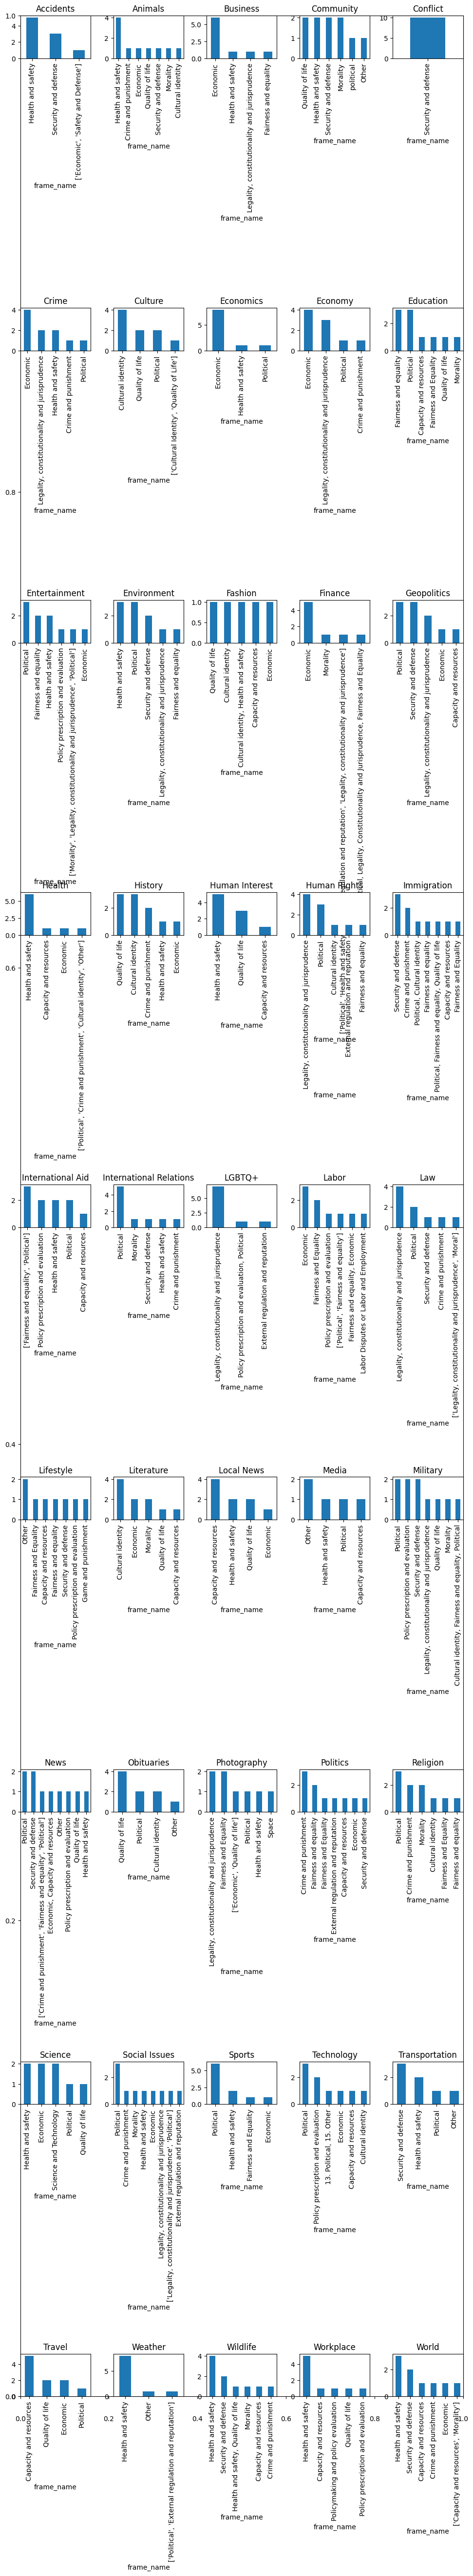

In [23]:
plt.subplots(figsize=(10, 50))
plt.tick_params(axis='x', which='major', pad=25)
for i, (group_name, group) in enumerate(merged_df.groupby('meta-topic-short')):
    plt.subplot(9, 5, i+1)
    group['frame_name'].value_counts().plot(kind='bar', xlabel=None)
    plt.title(group_name)
    plt.tight_layout()
# plt.savefig("../data/figures/frames_by_meta_topic_jul23.png")

In [6]:
import ast, json
from pdb import set_trace
entity_list = []
for i in merged_df['entities']:
    try:
        el = ast.literal_eval(i)
        es_list = [j['entity_sentiment'] for j in el]
        entity_list.extend(es_list)
    except:
        continue

In [15]:
entity_list_filtered = [i for i in entity_list if type(i) == str]

In [18]:
len(entity_list_filtered)

1730

In [16]:
entity_df = pd.DataFrame(entity_list_filtered, columns=['entity_sentiment'])
entity_df.value_counts()[:10]

entity_sentiment                                                                                                                                                                                                                                                                                    
Neutral                                                                                                                                                                                                                                                                                                 378
Positive                                                                                                                                                                                                                                                                                                 51
Negative                                                                                                   

In [20]:
vision_anno_df = pd.read_json("../data/annotated/topic_sampled_jul23_vision_llava.jsonl", lines=True)

In [31]:
pd.set_option('display.max_colwidth', None)

In [33]:
vision_anno_df.columns

Index(['uuid', 'image_file', 'headline', 'caption', 'category', 'actors',
       'actor_roles', 'symbols', 'representation', 'numbers', 'expressions',
       'gender', 'power', 'intimacy', 'image_emotion', 'people_emotion',
       'frame'],
      dtype='object')

In [ ]:
vision_anno_df[['image_file','caption']]

In [20]:
meta_topic_dict = json.load(open("../data/raw/meta_topics.json", "r"))